Exercise 2.2 - Three Body Problem

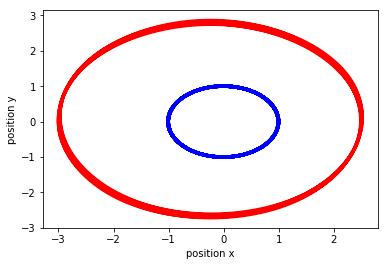

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot
from matplotlib.colors import ColorConverter as cc
import math

class particle2(object):
    
    def __init__(self, mass=1., x=0., y=0., vx=0., vy=0.):
        self.mass = mass
        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy
       
    def euler(self, fx, fy, dt):
        self.vx = self.vx + fx/self.mass*dt
        self.vy = self.vy + fy/self.mass*dt
        self.x = self.x + self.vx*dt
        self.y = self.y + self.vy*dt
        
NPLANETS = 2
dt = 0.0001            # time step
tmax = 35.
nsteps = int(tmax/dt)
GM = 4*math.pi**2
M  = 1

m1 = 0.1
r1 = 1.                  # radius of the orbit
v1 = math.sqrt(GM/r1)    # This is the condition for circular orbits 

m2 = 0.01
r2 = 3.             # radius of the orbit
v2 = math.sqrt(GM/r2)    # This is the condition for circular orbits 

x = np.zeros(shape=(nsteps,NPLANETS))
y = np.zeros(shape=(nsteps,NPLANETS))
vx = np.zeros(shape=(nsteps,NPLANETS)) 
vy = np.zeros(shape=(nsteps,NPLANETS))
energy = np.zeros(shape=(nsteps,NPLANETS))

x[0,0] = r1
y[0,0] = 0.
vx[0,0] = 0.
vy[0,0] = v1
energy[0][0] = 0.5*v1**2 - GM/r1
x[0,1] = -r2
y[0,1] = 0.
vx[0,1] = 0.
vy[0,1] = v2
energy[0][1] = 0.5*v2**2 - GM/r2

planets = [particle2]
for i in range(1,NPLANETS):        # create a list of NPLANETS particle2's
    planets.append([particle2])

m = [m1, m2]
for i in range(NPLANETS):
    planets[i] = particle2(m[i], x[0,i], y[0,i], vx[0,i], vy[0,i])

for i in range(1,nsteps):
    r1 = math.sqrt((planets[0].x)**2 + (planets[0].y)**2)
    r2 = math.sqrt((planets[1].x)**2 + (planets[1].y)**2)
    r21 = math.sqrt((planets[1].x-planets[0].x)**2+(planets[1].y-planets[0].y)**2)
    r12 = math.sqrt((planets[0].x-planets[1].x)**2+(planets[0].y-planets[1].y)**2)
    fx1 = -GM*planets[0].mass*planets[0].x/(r1**3) + GM*planets[0].mass*planets[1].mass*(planets[1].x-planets[0].x)/(r21**3)
    fy1 = -GM*planets[0].mass*planets[0].y/(r1**3) + GM*planets[0].mass*planets[1].mass*(planets[1].y-planets[0].y)/(r21**3)
    fx2 = -GM*planets[1].mass*planets[1].x/(r2**3) + GM*planets[0].mass*planets[1].mass*(planets[0].x-planets[1].x)/(r12**3)
    fy2 = -GM*planets[1].mass*planets[1].y/(r2**3) + GM*planets[0].mass*planets[1].mass*(planets[0].y-planets[1].y)/(r12**3)
    planets[0].euler(fx1, fy1, dt)
    planets[1].euler(fx2, fy2, dt)

    for n in range(NPLANETS):
        x[i,n] = planets[n].x
        y[i,n] = planets[n].y
        vx[i,n] = planets[n].vx
        vy[i,n] = planets[n].vy
        
    energy[i,0] = 0.5*(planets[0].vx**2+planets[0].vy**2) - GM/r1
    energy[i,1] = 0.5*(planets[1].vx**2+planets[1].vy**2) - GM/r2

t = np.linspace(0.,tmax,nsteps)

pyplot.plot(x[:,0], y[:,0], color='blue', ls='-', lw=3)
pyplot.plot(x[:,1], y[:,1], color='red', ls='-', lw=3)

pyplot.xlabel('position x')
pyplot.ylabel('position y');

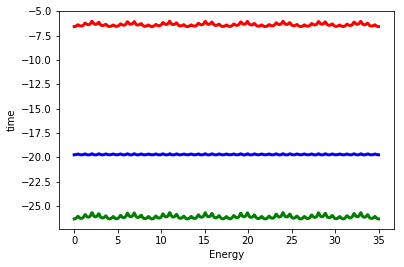

In [23]:
pyplot.plot(t, energy[:,0], color='blue', ls='-', lw=3, label='Planet 1')
pyplot.plot(t, energy[:,1], color='red', ls='-', lw=3, label = 'Planet 2')
pyplot.plot(t, energy[:,0]+energy[:,1], color='green', ls='-', lw=3, label = 'Both planets')

pyplot.xlabel('Energy')
pyplot.ylabel('time');

Exercise 2.3: Scattering

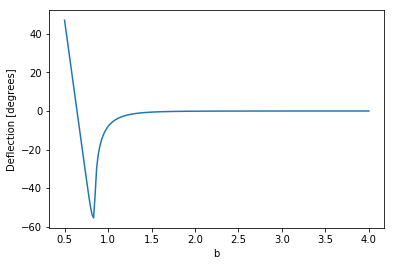

In [135]:
class particle1(object):
    
    def __init__(self, mass=1., x=0, y=0, vx=0, vy=0):
        self.mass = mass
        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy
        
    def euler(self, fx, fy, dt):
        self.vx = self.vx + fx/self.mass*dt
        self.vy = self.vy + fy/self.mass*dt
        self.x = self.x + self.vx*dt
        self.y = self.y + self.vy*dt
        

dt = 0.001            # time step
tmax = 3
nsteps = int(tmax/dt)
m = 1.
V_0 = 1.
r_min = 0.5
a = r_min/(2.)**(1/6.)

x = np.zeros([1,nsteps])
y = np.zeros([1,nsteps])
vx = np.zeros([1,nsteps])
vy = np.zeros([1,nsteps])

nb_param = 200
b = np.linspace(0.5,4,nb_param)
func_deflec = np.zeros([1,nb_param])

for i in range(0,nb_param):
    x[0,0] = -2
    y[0,0] = b[i]
    vx[0,0] = 1
    vy[0,0] = 0

    particle = particle1(m, x[0,0], y[0,0], vx[0,0], vy[0,0])
    
    for j in range(1,nsteps):
        r = math.sqrt((particle.x)**2 + (particle.y)**2)
        fx = 4*V_0*(12*a**12/r**13 - 6*a**6/r**7)*(particle.x/r)
        fy = 4*V_0*(12*a**12/r**13 - 6*a**6/r**7)*(particle.y/r)
        particle.euler(fx,fy,dt)
    
        x[0,j] = particle.x
        y[0,j] = particle.y
        vx[0,j] = particle.vx
        vy[0,j] = particle.vy
    
    x_test = x[0,int(nsteps/2):-1]
    y_test = y[0,int(nsteps/2):-1]
    dy = y_test[-1] - y_test[0]
    dx = x_test[-1] - x_test[0]
    func_deflec[0,i] = (180/np.pi)*np.arctan(dy/dx)
#    if dy < 0 and dx < 0: #fixing arctangent in the third quarter
  #      func_deflec[0,i] -= np.pi
    
pyplot.plot(b,func_deflec[0,:]);
pyplot.xlabel('b')
pyplot.ylabel('Deflection [degrees]')

In [141]:
class particle1(object):
    
    def __init__(self, mass=1., x=0, y=0, vx=0, vy=0):
        self.mass = mass
        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy
        
    def euler(self, fx, fy, dt):
        self.vx = self.vx + fx/self.mass*dt
        self.vy = self.vy + fy/self.mass*dt
        self.x = self.x + self.vx*dt
        self.y = self.y + self.vy*dt
        

dt = 0.001            # time step
tmax = 3
nsteps = int(tmax/dt)
m = 1.
V_0 = 1.
r_min = 0.5
a = r_min/(2.)**(1/6.)

x = np.zeros([1,nsteps])
y = np.zeros([1,nsteps])
vx = np.zeros([1,nsteps])
vy = np.zeros([1,nsteps])

E_param = 25
E = np.linspace(0.1*V_0, 100*V_0, E_param)

nb_param = 200
b = np.linspace(0.5,4,nb_param)
func_deflec = np.zeros([E_param,nb_param])

for k in range(0,E_param):
    for i in range(0,nb_param):
        x[0,0] = -2
        y[0,0] = b[i]
        vy[0,0] = 0
        vx[0,0] = np.sqrt(2*E[k]/m)
        
        particle = particle1(m, x[0,0], y[0,0], vx[0,0], vy[0,0])
    
        for j in range(1,nsteps):
            r = math.sqrt((particle.x)**2 + (particle.y)**2)
            fx = 4*V_0*(12*a**12/r**13 - 6*a**6/r**7)*(particle.x/r)
            fy = 4*V_0*(12*a**12/r**13 - 6*a**6/r**7)*(particle.y/r)
            particle.euler(fx,fy,dt)
    
            x[0,j] = particle.x
            y[0,j] = particle.y
            vx[0,j] = particle.vx
            vy[0,j] = particle.vy
    
        x_test = x[0,int(nsteps/2):-1]
        y_test = y[0,int(nsteps/2):-1]
        dy = y_test[-1] - y_test[0]
        dx = x_test[-1] - x_test[0]
        func_deflec[k,i] = (180/np.pi)*np.arctan(dy/dx)

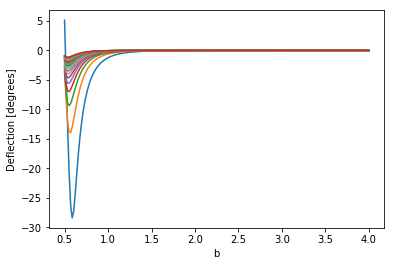

In [143]:
for i in range(1,E_param):
    pyplot.plot(b, func_deflec[i,:])

pyplot.xlabel('b')
pyplot.ylabel('Deflection [degrees]')

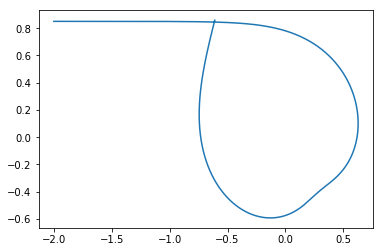

In [159]:
dt = 0.0001            # time step
tmax = 5
nsteps = int(tmax/dt)
m = 1.
V_0 = 1.
r_min = 0.5
a = r_min/(2.)**(1/6.)

x = np.zeros([1,nsteps])
y = np.zeros([1,nsteps])
vx = np.zeros([1,nsteps])
vy = np.zeros([1,nsteps])

x[0,0] = -2
y[0,0] = 0.85
vy[0,0] = 0
vx[0,0] = 1
        
particle = particle1(m, x[0,0], y[0,0], vx[0,0], vy[0,0])
    
for j in range(1,nsteps):
    r = math.sqrt((particle.x)**2 + (particle.y)**2)
    fx = 4*V_0*(12*a**12/r**13 - 6*a**6/r**7)*(particle.x/r)
    fy = 4*V_0*(12*a**12/r**13 - 6*a**6/r**7)*(particle.y/r)
    particle.euler(fx,fy,dt)
    
    x[0,j] = particle.x
    y[0,j] = particle.y
    vx[0,j] = particle.vx
    vy[0,j] = particle.vy
    
pyplot.plot(x[0,:], y[0,:])
pyplot.xlabel('x')
pyplot.ylabel('y')